In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [2]:
health_df = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/health_lifestyle_classification.csv")
health_df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [3]:
data_info_df = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/data info - Sayfa1.csv")
data_info_df.head()

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
0,alcohol_consumption,100000,42387,0.42387,object,[nan 'Regularly' 'Occasionally'],3,-,-,Ordinal
1,caffeine_intake,100000,33261,0.33261,object,['Moderate' 'High' nan],3,-,-,Ordinal
2,exercise_type,100000,24969,0.24969,object,['Strength' 'Cardio' 'Mixed' nan],4,-,-,Nominal
3,insulin,100000,15836,0.15836,float64,[ nan 10.13159744 18.73317943 ... 17.80...,84165,35.46475,-6.79448,Continuous-Ratio
4,heart_rate,100000,14003,0.14003,float64,[60.74982467 66.46369626 76.04321196 ... 56.33...,85998,114.13604,34.74509,Continuous-Ratio


## Drop highly correlated columns

In [4]:
hcc = ["bmi_estimated","bmi_scaled","bmi_corrected"]
if all(col in health_df.columns for col in hcc):
    health_df = health_df.drop(columns=hcc) # main df changed
    print("Dropped specified columns.")
else:
    print("Not all specified columns were present.")
print(health_df.columns)

Dropped specified columns.
Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score',
       'daily_supplement_dosage', 'target'],
      dtype='object')


## Drop Single value columns

In [5]:
columns_to_drop = ["electrolyte_level", "environmental_risk_score","gene_marker_flag"]
if all(col in health_df.columns for col in columns_to_drop):
    health_df = health_df.drop(columns=columns_to_drop) # main df changed
    print("Dropped specified columns.")
else:
    print("Not all specified columns were present.")
print(health_df.columns)

Dropped specified columns.
Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'daily_supplement_dosage', 'target'],
      dtype='object')


## Train-Validation-Test split

In [6]:
# bu kısmı atlama
# train valid test için target dengesi lazım
X = health_df.drop(columns="target")
y = health_df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (80000, 41)
X_test: (20000, 41)
y_train: (80000,)
y_test: (20000,)


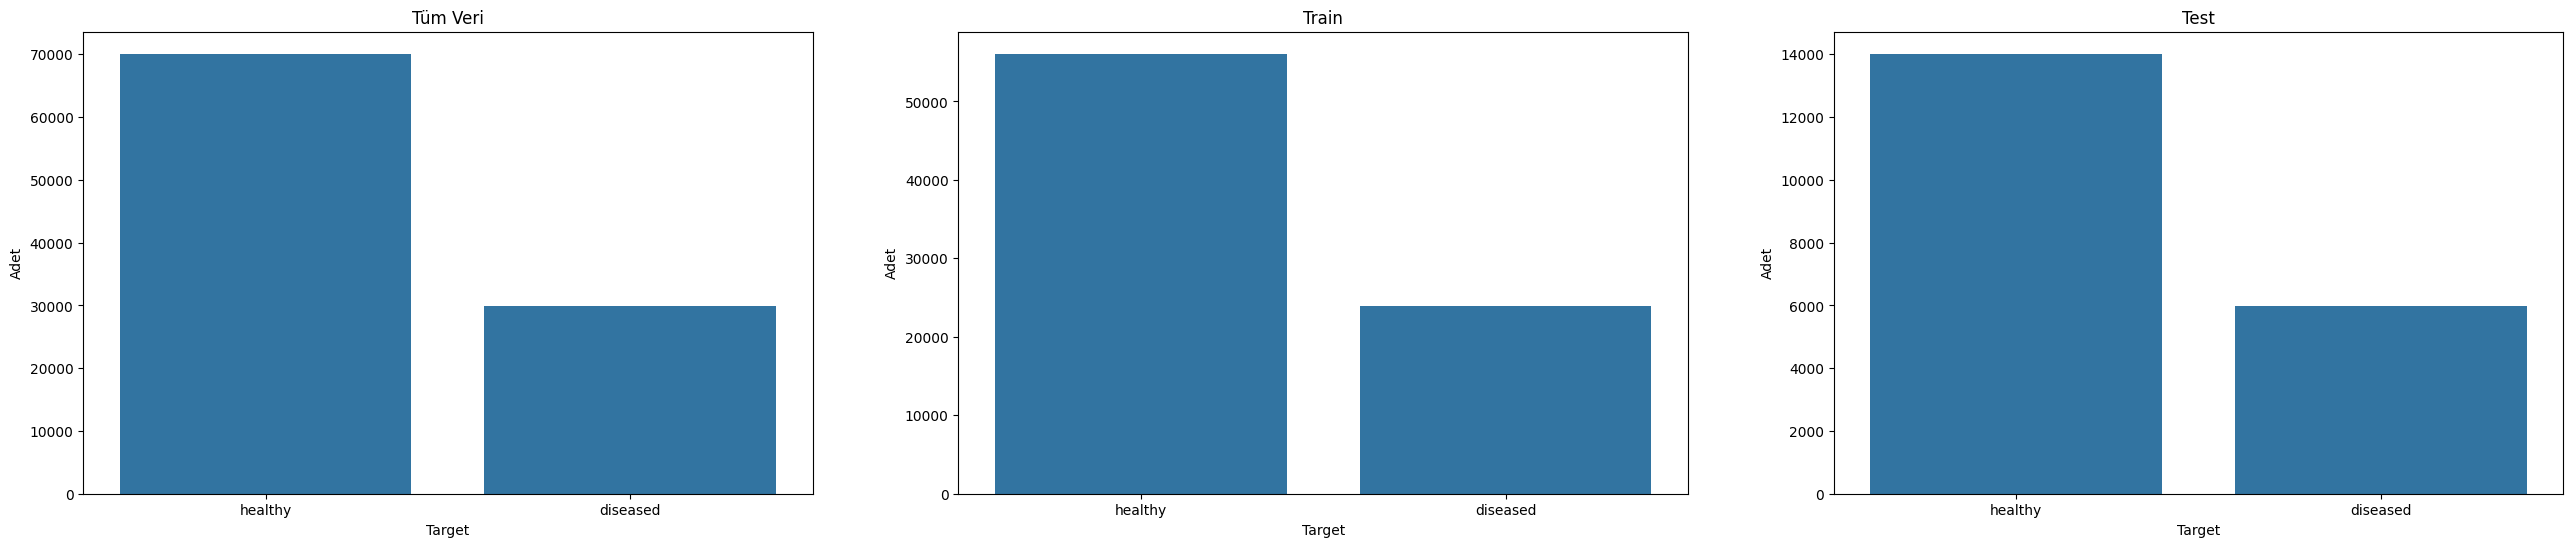

In [7]:
# count gösterimi
fig, axs = plt.subplots(1, 3, figsize=(32, 6))

datasets = [y, y_train, y_test]
titles = ["Tüm Veri", "Train", "Test"]

for ax, data, title in zip(axs, datasets, titles):
    sns.countplot(x=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Target")
    ax.set_ylabel("Adet")

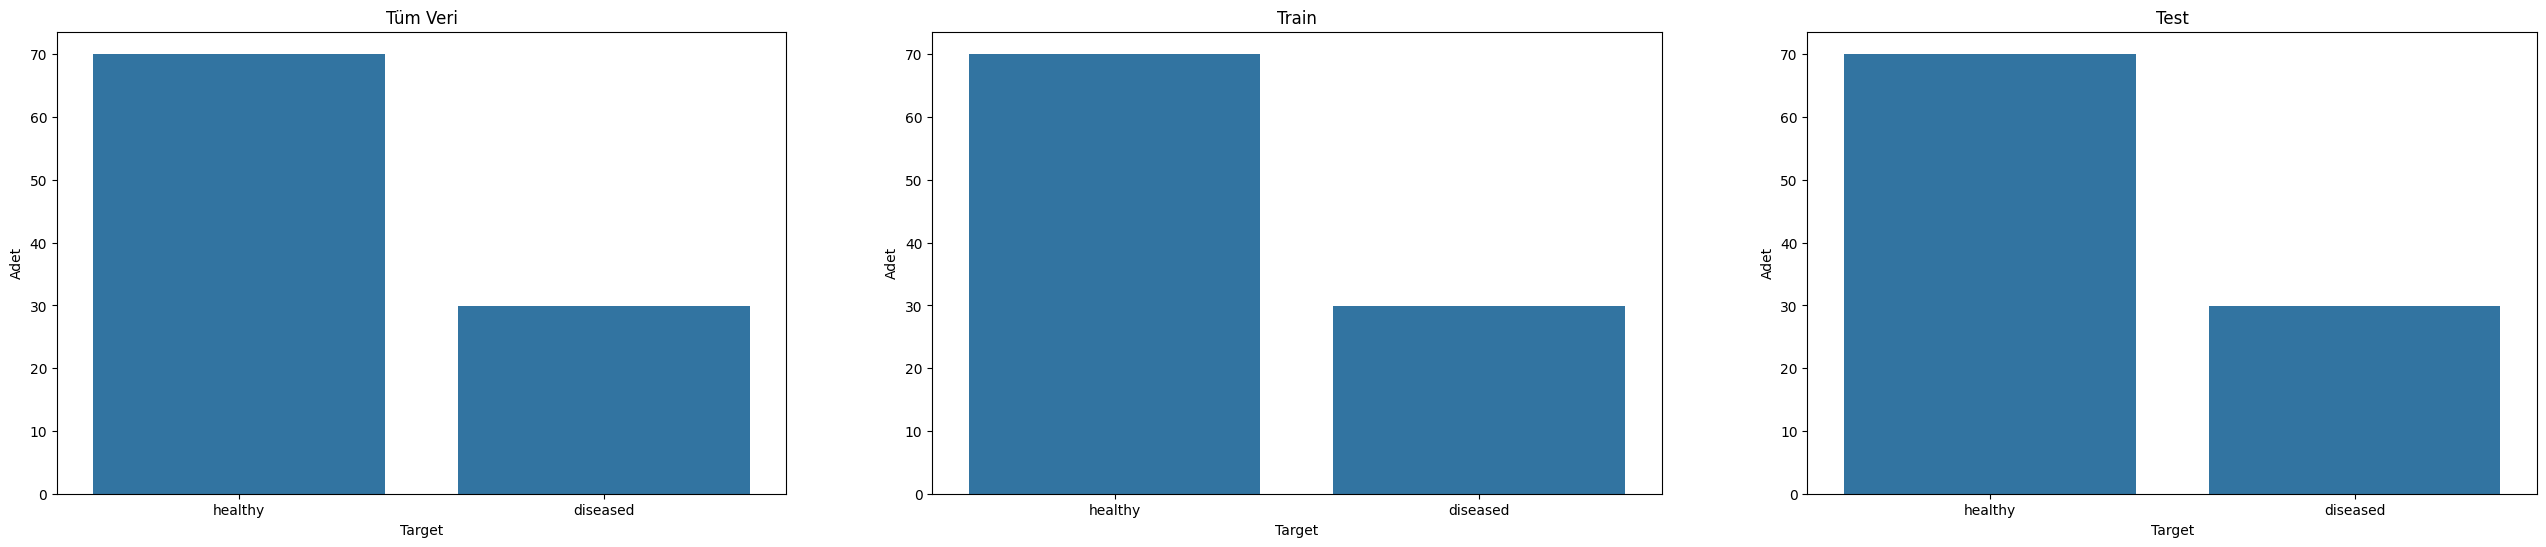

In [8]:
# yüzde gösterimi
fig, axs = plt.subplots(1, 3, figsize=(32, 6))

datasets = [y, y_train, y_test]
titles = ["Tüm Veri", "Train", "Test"]

for ax, data, title in zip(axs, datasets, titles):
    sns.countplot(x=data, ax=ax, stat="percent")
    ax.set_title(title)
    ax.set_xlabel("Target")
    ax.set_ylabel("Adet")

## Filling null values

In [9]:
data_info_df[data_info_df["Missing Value"]!=0]
# boş değerler varken nasıl lineer regresyon yapayım?

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
0,alcohol_consumption,100000,42387,0.42387,object,[nan 'Regularly' 'Occasionally'],3,-,-,Ordinal
1,caffeine_intake,100000,33261,0.33261,object,['Moderate' 'High' nan],3,-,-,Ordinal
2,exercise_type,100000,24969,0.24969,object,['Strength' 'Cardio' 'Mixed' nan],4,-,-,Nominal
3,insulin,100000,15836,0.15836,float64,[ nan 10.13159744 18.73317943 ... 17.80...,84165,35.46475,-6.79448,Continuous-Ratio
4,heart_rate,100000,14003,0.14003,float64,[60.74982467 66.46369626 76.04321196 ... 56.33...,85998,114.13604,34.74509,Continuous-Ratio
5,gene_marker_flag,100000,10474,0.10474,float64,[ 1. nan],2,1.0,1.0,Nominal
6,income,100000,8470,0.08470,float64,[6759.82171934 6240.51768988 3429.17926628 ......,87873,12029.40935,500.0,Continuous-Ratio
7,daily_steps,100000,8329,0.08329,float64,[13320.94259457 11911.201401 2974.03537534 ...,90935,18064.96954,1000.0,Continuous-Ratio
8,blood_pressure,100000,7669,0.07669,float64,[118.26425414 117.91798577 123.0736977 ... 14...,92332,184.4392,59.12817,Continuous-Ratio


In [10]:
missing_cols = data_info_df[data_info_df["Missing Value"]!=0]["Variable"].to_list()
missing_cols.reverse()
print(missing_cols)

['blood_pressure', 'daily_steps', 'income', 'gene_marker_flag', 'heart_rate', 'insulin', 'exercise_type', 'caffeine_intake', 'alcohol_consumption']


In [11]:
ordinals = data_info_df[(data_info_df["Data Type"] == "object") & (data_info_df["Variable Structure"] == "Ordinal")]["Variable"].tolist()
nominals = data_info_df[(data_info_df["Data Type"] == "object") & (data_info_df["Variable Structure"] == "Nominal")]["Variable"].tolist()
print("Ordinals:\n",ordinals)
print("Nominals:\n",nominals)

Ordinals:
 ['alcohol_consumption', 'caffeine_intake', 'sleep_quality', 'smoking_level', 'education_level', 'healthcare_access', 'device_usage', 'sunlight_exposure']
Nominals:
 ['exercise_type', 'gender', 'occupation', 'job_type', 'mental_health_support', 'insurance', 'diet_type', 'pet_owner', 'family_history', 'target']


# Filling İşlem

## Encoding Fonksiyonu

In [12]:
ordinals_map = {
    "alcohol_consumption":{"Occasionally":0,"Regularly":1},
    "caffeine_intake":{"Moderate":0, "High":1},
    "sleep_quality":{'Poor' : 0,'Fair':1,'Good':2,'Excellent':3},
    "smoking_level":{'Non-smoker':0,'Light':1,'Heavy':2},
    "education_level":{'High School':0,'Bachelor':1,'Master':2,'PhD':3},
    "healthcare_access":{'Poor':0,'Moderate':1,'Good':2},
    "device_usage":{'Low':0,'Moderate':1,'High':2},
    "sunlight_exposure":{'Low':0,'Moderate':1,'High':2},
}

def encode(df, excluded_col):
    for col in df.columns:
        if col in ordinals:
            df[col] = df[col].map(ordinals_map[col])
            if col == excluded_col:
                continue
            df[col] = df[col].fillna(df[col].mode()[0])
        elif col in nominals:
            if col == excluded_col:
                continue
            df[col] = df[col].fillna("Unknown")
        else:
            if col == excluded_col:
                continue
            df[col] = df[col].fillna(df[col].mean())
    df = pd.get_dummies(df, columns=nominals, drop_first=False)
    return df

In [13]:
X_train_copy = X_train.copy()
X_train_copy["target"] = y_train

In [14]:
# Mesafe temelli olduğu için veriyi ölçeklendirmek KNN için kritiktir
scaler = StandardScaler()

for col in ['blood_pressure', 'daily_steps', 'income', 'heart_rate', 'insulin']:
    print("-" * 5, col, "-" * 5)

    # 1. Veriyi encode et (sizin fonksiyonunuz)
    encoded_df = encode(X_train_copy.copy(), col)

    # 2. Eğitim ve Test setlerini ayır
    train_data = encoded_df[encoded_df[col].notna()]
    test_data = encoded_df[encoded_df[col].isna()]

    if test_data.empty:
        continue

    X_train_sub = train_data.drop(columns=col)
    y_train_sub = train_data[col]
    X_test_sub = test_data.drop(columns=col)

    # 3. ÖLÇEKLENDİRME (KNN için zorunlu)
    X_train_scaled = scaler.fit_transform(X_train_sub)
    X_test_scaled = scaler.transform(X_test_sub)

    # 4. MODEL: 10 komşulu KNN Regressor
    # weights='distance' parametresi daha yakın komşulara daha fazla önem verir,
    # bu da dağılımı daha da doğallaştırır.
    model = KNeighborsRegressor(n_neighbors=10, weights='distance')
    model.fit(X_train_scaled, y_train_sub)

    print("Tahmin yapılıyor...")
    y_pred = model.predict(X_test_scaled)

    # 5. Yerine koyma
    X_train_copy.loc[X_train_copy[col].isna(), col] = y_pred

----- blood_pressure -----
Tahmin yapılıyor...
----- daily_steps -----
Tahmin yapılıyor...
----- income -----
Tahmin yapılıyor...
----- heart_rate -----
Tahmin yapılıyor...
----- insulin -----
Tahmin yapılıyor...


In [15]:
# eski imputation kodu
"""for col in ['blood_pressure', 'daily_steps', 'income','heart_rate','insulin']:
  print("-"*5,col,"-"*5)
  encoded_df = encode(X_train_copy.copy(),col)
  encoded_Train = encoded_df[encoded_df[col].notna()]
  encoded_X_train = encoded_Train.drop(columns=col)
  encoded_y_train = encoded_Train[col]
  encoded_Test = encoded_df[encoded_df[col].isna()]
  encoded_X_test = encoded_Test.drop(columns=col)
  model = Lasso(alpha=0.1)
  model.fit(encoded_X_train,encoded_y_train)
  print("devam")
  y_pred = model.predict(encoded_X_test)
  X_train_copy.loc[X_train_copy[col].isna(), col] = y_pred"""

'for col in [\'blood_pressure\', \'daily_steps\', \'income\',\'heart_rate\',\'insulin\']:\n  print("-"*5,col,"-"*5)\n  encoded_df = encode(X_train_copy.copy(),col)\n  encoded_Train = encoded_df[encoded_df[col].notna()]\n  encoded_X_train = encoded_Train.drop(columns=col)\n  encoded_y_train = encoded_Train[col]\n  encoded_Test = encoded_df[encoded_df[col].isna()]\n  encoded_X_test = encoded_Test.drop(columns=col)\n  model = Lasso(alpha=0.1)\n  model.fit(encoded_X_train,encoded_y_train)\n  print("devam")\n  y_pred = model.predict(encoded_X_test)\n  X_train_copy.loc[X_train_copy[col].isna(), col] = y_pred'

In [16]:
X_train_copy.isna().sum().sort_values(ascending=False).head(10)

,0
alcohol_consumption,33801
caffeine_intake,26587
exercise_type,19944
gender,0
weight,0
bmi,0
waist_size,0
height,0
survey_code,0
age,0


## Gene Marker Flag: Seems like i will get rid of it because it only has a single value; but for now, lets impute that also

In [17]:
# X_train_copy["gene_marker_flag"] = X_train_copy["gene_marker_flag"].fillna(X_train_copy["gene_marker_flag"].mean())

In [18]:
X_train_copy.isna().sum().sort_values(ascending=False).head(10)

,0
alcohol_consumption,33801
caffeine_intake,26587
exercise_type,19944
gender,0
weight,0
bmi,0
waist_size,0
height,0
survey_code,0
age,0


## Exercise Type

In [19]:
df = X_train_copy[["exercise_type", "target"]]
df.head()

,exercise_type,target
3337,Cardio,healthy
6374,Strength,healthy
57398,NaN,diseased
43548,Cardio,healthy
26578,Mixed,diseased


In [20]:
df["target"] = df["target"].map({
    "healthy": 0,
    "diseased": 1
})
df["exercise_type"] = df["exercise_type"].fillna("Missing")
df.head(10)

/tmp/ipython-input-1833679414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["target"].map({
/tmp/ipython-input-1833679414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exercise_type"] = df["exercise_type"].fillna("Missing")


,exercise_type,target
3337,Cardio,0
6374,Strength,0
57398,Missing,1
43548,Cardio,0
26578,Mixed,1
63446,Cardio,0
36555,Mixed,1
9247,Mixed,0
9677,Strength,0
12172,Strength,0


In [22]:
from category_encoders import TargetEncoder

# Modeli kurma
# Smoothing parametresi, veri setindeki gürültüyü azaltmak için kullanılır
encoder = TargetEncoder(cols=['exercise_type'])

# Target Encoding uygulama
df['exercise_type_encoded'] = encoder.fit_transform(df['exercise_type'], df['target'])

print(df[['exercise_type', 'exercise_type_encoded']].head())

      exercise_type  exercise_type_encoded
3337         Cardio               0.304385
6374       Strength               0.293567
57398       Missing               0.299539
43548        Cardio               0.304385
26578         Mixed               0.298709


/tmp/ipython-input-1765202252.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exercise_type_encoded'] = encoder.fit_transform(df['exercise_type'], df['target'])


In [23]:
df["exercise_type"].value_counts()

,count
exercise_type,
Strength,20302
Missing,19944
Cardio,19932
Mixed,19822


bu sonuçtan görüldüğü üzere ve gemini'in yaptığı yoruma göre SC + ME yöntemleri uygulandıktan sonraki veriye bakılacak olursa Exercise type'ın farklı değerleri ve target arasında farklı korelasyonlar gözlemlenmedi, bu da değerlerin target için çok da bir fark yaratmadığını belirtiyor. Bu yüzden en sağlıklı olanın "Missing" adında yeni bir değer eklenerek ilerlenmesi olduğunu söylenebilir.

In [24]:
X_train_copy["exercise_type"] = df["exercise_type"]

In [25]:
X_train_copy.isna().sum().sort_values(ascending=False).head(10)

,0
alcohol_consumption,33801
caffeine_intake,26587
gender,0
height,0
weight,0
bmi,0
waist_size,0
blood_pressure,0
survey_code,0
age,0


## Caffeine Intake

TBI + ME kullanılacak

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
encoded_df = encode(X_train_copy.copy(),"caffeine_intake")
encoded_df.head()

,survey_code,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,education_level,income,device_usage,healthcare_access,sunlight_exposure,meals_per_day,caffeine_intake,daily_supplement_dosage,exercise_type_Cardio,exercise_type_Missing,exercise_type_Mixed,exercise_type_Strength,gender_Female,gender_Male,occupation_Artist,occupation_Doctor,occupation_Driver,occupation_Engineer,occupation_Farmer,occupation_Teacher,job_type_Healthcare,job_type_Labor,job_type_Office,job_type_Service,job_type_Tech,job_type_Unemployed,mental_health_support_No,mental_health_support_Yes,insurance_No,insurance_Yes,diet_type_Keto,diet_type_Omnivore,diet_type_Vegan,diet_type_Vegetarian,pet_owner_No,pet_owner_Yes,family_history_No,family_history_Yes,target_diseased,target_healthy
3337,3338,32,172.345143,58.320401,19.634616,79.391952,109.961156,58.590220,205.244882,135.061225,14.661497,6.155028,3,10.341084,2.921698,9449.577777,2071.330493,84.757386,1.0,2,1.515049,4.392296,3,4,3,5416.474718,2,0,0,2,0.0,7.311929,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,True
6374,6375,47,178.363548,79.621461,25.027527,85.552866,106.752415,62.751381,200.624004,74.565206,10.855174,7.744948,0,11.531094,3.382933,6677.403431,2200.291064,85.625402,0.0,2,2.368986,4.452693,0,6,1,3651.845958,0,0,0,1,0.0,-0.358541,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True,False,True
57398,57399,74,180.494349,66.970772,20.556922,78.333175,127.369136,84.754053,190.893362,99.934272,14.297654,7.174135,3,8.157126,6.787335,7932.473548,2811.661032,87.235290,0.0,1,2.061471,5.918038,5,3,0,5670.780324,0,2,2,1,NaN,-6.442299,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,True,False,True,True,False
43548,43549,40,177.126227,40.732947,12.983150,82.363994,106.993876,72.346162,168.230123,114.237653,15.629120,5.086677,3,8.687452,2.430216,7364.174829,1193.292368,78.792460,1.0,0,2.014246,11.704708,6,3,0,4472.701007,1,0,2,5,NaN,-4.842053,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True
26578,26579,69,182.452538,87.362878,26.243824,88.153017,96.769803,78.983224,172.797071,79.693562,18.655003,8.154730,2,3.335051,0.205170,6607.475262,2795.181122,43.696297,0.0,0,0.817679,7.225914,10,2,0,4892.252583,2,0,2,3,NaN,-3.273304,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,True,False,False,True,True,False


In [28]:
encoded_Train = encoded_df[encoded_df["caffeine_intake"].notna()]
encoded_X_train = encoded_Train.drop(columns="caffeine_intake")
encoded_y_train = encoded_Train["caffeine_intake"]
encoded_Test = encoded_df[encoded_df["caffeine_intake"].isna()]
encoded_X_test = encoded_Test.drop(columns="caffeine_intake")

In [29]:
model = DecisionTreeClassifier(max_depth=4,random_state=13)
model.fit(encoded_X_train, encoded_y_train)
y_pred = model.predict(encoded_X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [30]:
encoded_df.loc[encoded_df["caffeine_intake"].isna(), "caffeine_intake"] = y_pred
encoded_df["caffeine_intake"].value_counts()

,count
caffeine_intake,
1.0,45700
0.0,34300


In [31]:
X_train_copy["caffeine_intake"].value_counts()

,count
caffeine_intake,
High,26846
Moderate,26567


In [32]:
X_train_copy["caffeine_intake"] = encoded_df["caffeine_intake"].map({0:"Moderate", 1:"High"})

In [33]:
X_train_copy.isna().sum().sort_values(ascending=False).head(10)

,0
alcohol_consumption,33801
survey_code,0
gender,0
height,0
weight,0
bmi,0
waist_size,0
blood_pressure,0
heart_rate,0
age,0


ME nin tam olarak nerede kullanıldığından emin olamadım, o yüzden hocaya soracağım.

## Alcohol Consumption

In [34]:
encoded_df = encode(X_train_copy.copy(),"alcohol_consumption")
encoded_df.head()

,survey_code,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,education_level,income,device_usage,healthcare_access,sunlight_exposure,meals_per_day,caffeine_intake,daily_supplement_dosage,exercise_type_Cardio,exercise_type_Missing,exercise_type_Mixed,exercise_type_Strength,gender_Female,gender_Male,occupation_Artist,occupation_Doctor,occupation_Driver,occupation_Engineer,occupation_Farmer,occupation_Teacher,job_type_Healthcare,job_type_Labor,job_type_Office,job_type_Service,job_type_Tech,job_type_Unemployed,mental_health_support_No,mental_health_support_Yes,insurance_No,insurance_Yes,diet_type_Keto,diet_type_Omnivore,diet_type_Vegan,diet_type_Vegetarian,pet_owner_No,pet_owner_Yes,family_history_No,family_history_Yes,target_diseased,target_healthy
3337,3338,32,172.345143,58.320401,19.634616,79.391952,109.961156,58.590220,205.244882,135.061225,14.661497,6.155028,3,10.341084,2.921698,9449.577777,2071.330493,84.757386,1.0,2,1.515049,4.392296,3,4,3,5416.474718,2,0,0,2,0,7.311929,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,True
6374,6375,47,178.363548,79.621461,25.027527,85.552866,106.752415,62.751381,200.624004,74.565206,10.855174,7.744948,0,11.531094,3.382933,6677.403431,2200.291064,85.625402,0.0,2,2.368986,4.452693,0,6,1,3651.845958,0,0,0,1,0,-0.358541,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True,False,True
57398,57399,74,180.494349,66.970772,20.556922,78.333175,127.369136,84.754053,190.893362,99.934272,14.297654,7.174135,3,8.157126,6.787335,7932.473548,2811.661032,87.235290,NaN,1,2.061471,5.918038,5,3,0,5670.780324,0,2,2,1,1,-6.442299,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,True,False,True,True,False
43548,43549,40,177.126227,40.732947,12.983150,82.363994,106.993876,72.346162,168.230123,114.237653,15.629120,5.086677,3,8.687452,2.430216,7364.174829,1193.292368,78.792460,1.0,0,2.014246,11.704708,6,3,0,4472.701007,1,0,2,5,1,-4.842053,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True
26578,26579,69,182.452538,87.362878,26.243824,88.153017,96.769803,78.983224,172.797071,79.693562,18.655003,8.154730,2,3.335051,0.205170,6607.475262,2795.181122,43.696297,0.0,0,0.817679,7.225914,10,2,0,4892.252583,2,0,2,3,1,-3.273304,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,True,False,False,True,True,False


In [35]:
encoded_Train = encoded_df[encoded_df["alcohol_consumption"].notna()]
encoded_X_train = encoded_Train.drop(columns="alcohol_consumption")
encoded_y_train = encoded_Train["alcohol_consumption"]
encoded_Test = encoded_df[encoded_df["alcohol_consumption"].isna()]
encoded_X_test = encoded_Test.drop(columns="alcohol_consumption")

In [36]:
model = DecisionTreeClassifier(max_depth=4,random_state=13)
model.fit(encoded_X_train, encoded_y_train)
y_pred = model.predict(encoded_X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 1.])

In [37]:
encoded_df.loc[encoded_df["alcohol_consumption"].isna(), "alcohol_consumption"] = y_pred
encoded_df["alcohol_consumption"].value_counts()

,count
alcohol_consumption,
0.0,43126
1.0,36874


In [38]:
X_train_copy["alcohol_consumption"].value_counts()

,count
alcohol_consumption,
Occasionally,23110
Regularly,23089


In [39]:
X_train_copy["alcohol_consumption"] = encoded_df["alcohol_consumption"].map({0:"Occasionally",1:"Regularly"})

In [40]:
X_train_copy.isna().sum().sort_values(ascending=False).head(10)

,0
survey_code,0
age,0
gender,0
height,0
weight,0
bmi,0
waist_size,0
blood_pressure,0
heart_rate,0
cholesterol,0


YUPPİİ! EKSİK VERİ KALMADI

şimdi ise outliers için bir kontrol yapacağız

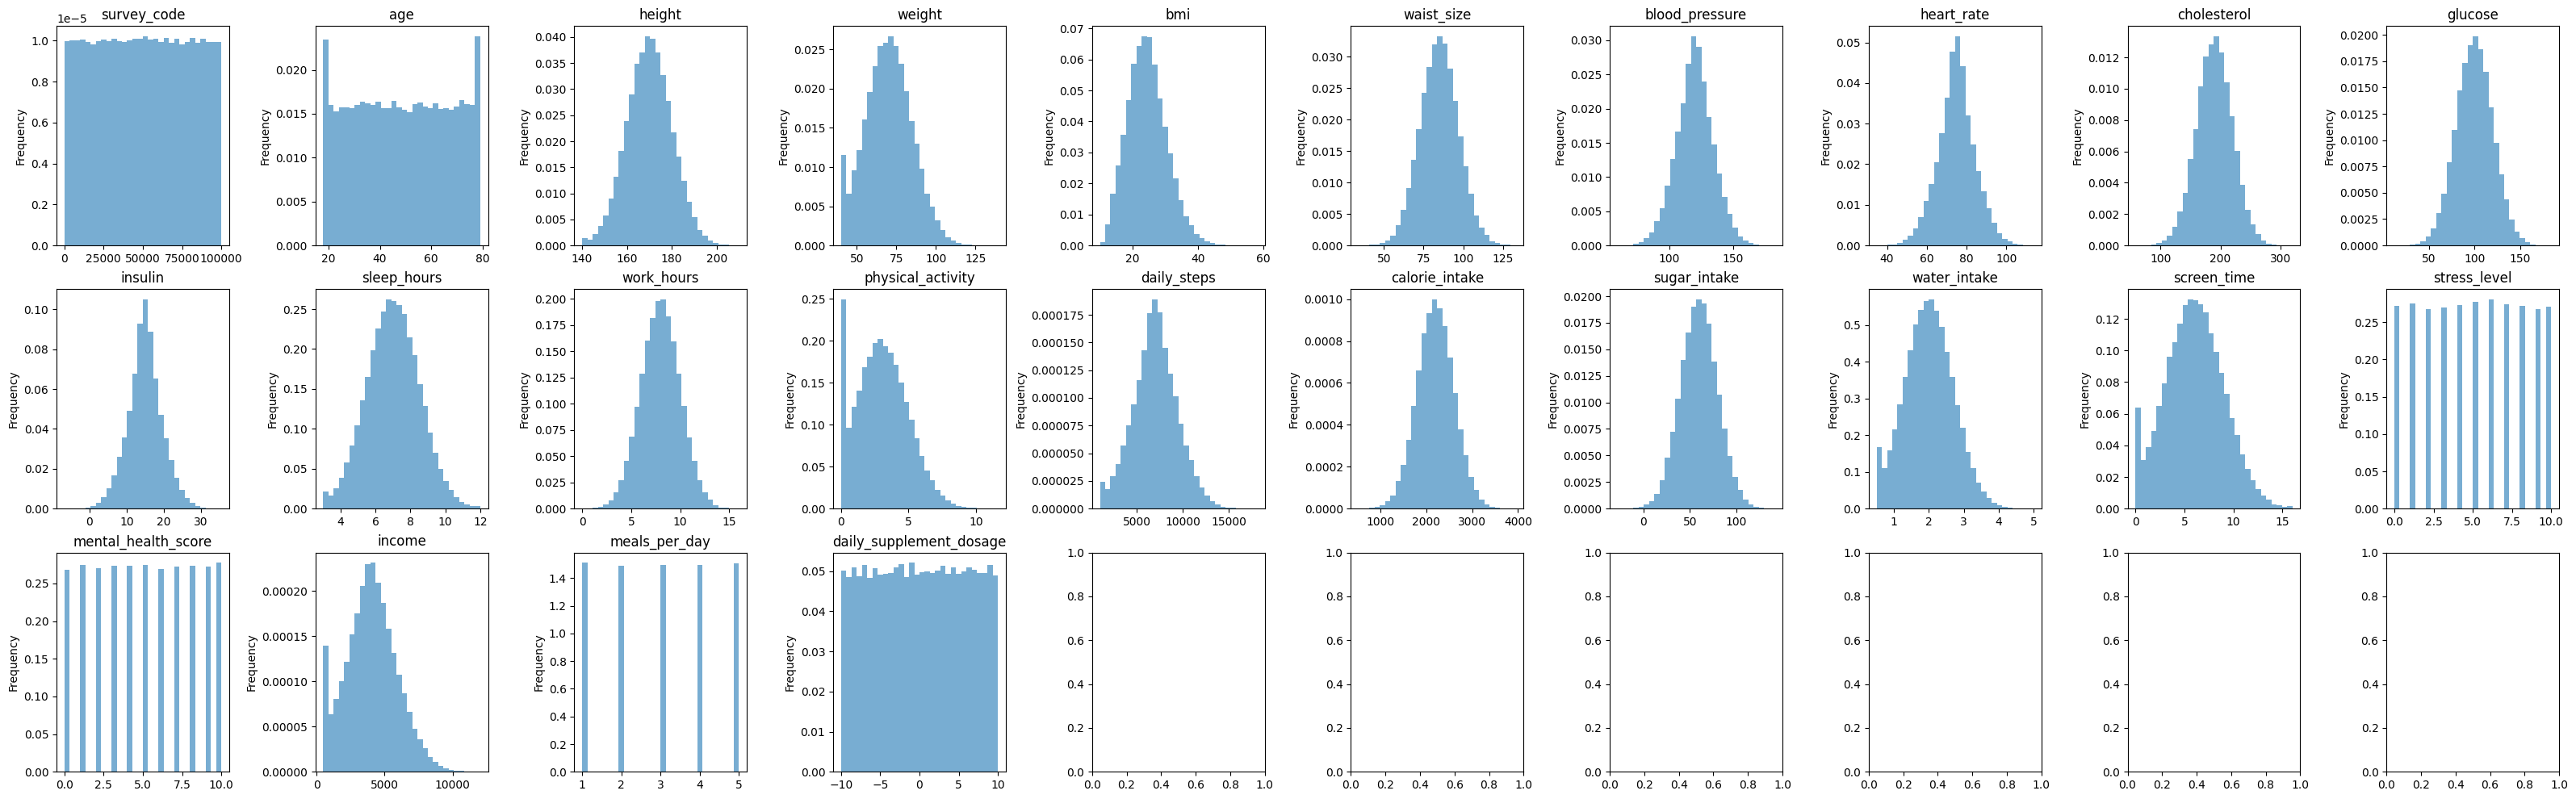

In [48]:
numerics = X_train_copy.select_dtypes(include="number").columns

# for continuous/cardinal columns
fig, axs = plt.subplots(3, 10, figsize=(40, 12))
axs = axs.flatten()

for ax, col in zip(axs, numerics):
    X_train_copy[col].plot(kind="hist", density=True, bins=30, alpha=0.6, ax=ax)
    ax.set_title(col)
plt.subplots_adjust(wspace=0.5)

now we can paste our filled data on original missing table

In [41]:
X_train = X_train_copy

# Handling Outliers

Z = (X - avg(X)) / std(X)

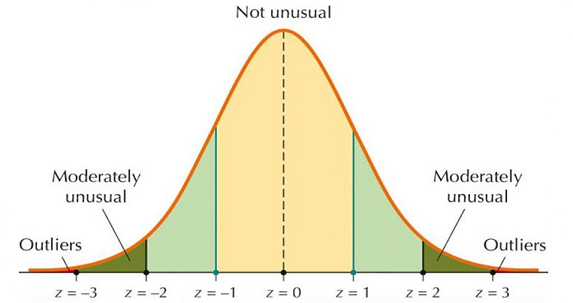

## weight

<Axes: ylabel='Frequency'>

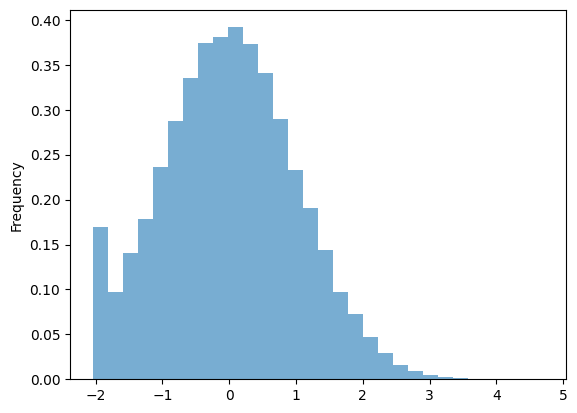

In [60]:
Z = (X_train["weight"] - X_train["weight"].mean()) / X_train["weight"].std()
Z.plot(kind="hist", density=True, bins=30, alpha=0.6)

In [62]:
print(X_train["weight"].max())
print(X_train["weight"].min())
print(X_train["weight"].std())
print(X_train["weight"].mean())

139.25089422408502
40.0
14.696609300484749
70.07231129518352


## physical_activity

<Axes: ylabel='Frequency'>

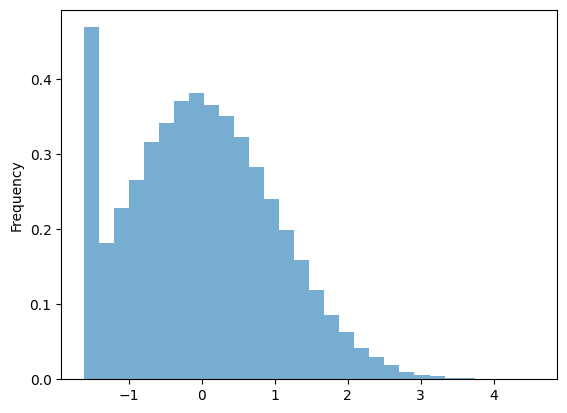

In [63]:
Z = (X_train["physical_activity"] - X_train["physical_activity"].mean()) / X_train["physical_activity"].std()
Z.plot(kind="hist", density=True, bins=30, alpha=0.6)

In [64]:
print(X_train["physical_activity"].max())
print(X_train["physical_activity"].min())
print(X_train["physical_activity"].std())
print(X_train["physical_activity"].mean())

11.631898148758928
0.0
1.8836618966921237
3.0417038176496702
